In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
import math
from sklearn.neighbors import KernelDensity

In [6]:
# read data
data = pd.read_csv("n90pol.csv")

# get the range of data
range_amygdala = [min(data['amygdala']), max(data['amygdala'])]
range_acc = [min(data['acc']), max(data['acc'])]
range_orientation = [min(data['orientation']), max(data['orientation'])]

amygdala     acc  orientation
0     0.0051 -0.0286            2
1    -0.0674  0.0007            3
2    -0.0257 -0.0110            3
3     0.0504 -0.0167            2
4     0.0125 -0.0005            5
..       ...     ...          ...
85    0.0174 -0.0242            2
86    0.0251 -0.0087            3
87    0.0676  0.0120            2
88   -0.0097 -0.0239            3
89    0.0374  0.0502            3

[90 rows x 3 columns]

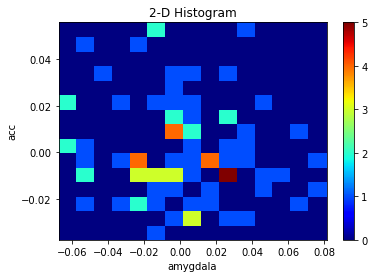

In [3]:
# plot the histogram
x = data['amygdala']
y = data['acc']
plt.hist2d(x, y, bins=(15, 15), cmap=plt.cm.jet)
plt.xlabel("amygdala")
plt.ylabel("acc")
plt.title("2-D Histogram")
plt.colorbar()
plt.show()

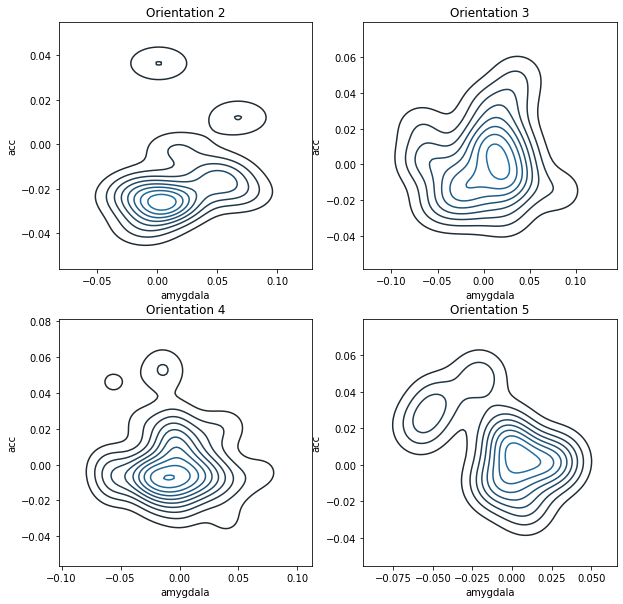

In [4]:
# KDE Contour Plot
ranges = list(set(data['orientation']))
dataset =[]
for i in range(len(ranges)):
    dataset.append(data[data['orientation'] == ranges[i]])
    
    
col = math.ceil(np.sqrt(len(ranges)))
row = math.ceil(np.sqrt(len(ranges)))
fig ,ax= plt.subplots(figsize = (10,10), ncols = col, nrows = row)
for i in range(len(ranges)):
    ax[int(i/col)][i%col].set_title("Orientation " + str(ranges[i]))
    sns.kdeplot(dataset[i]["amygdala"], dataset[i]["acc"], ax = ax[int(i/col)][i%col])
plt.show()

[0.14444444 0.26666667 0.45555556 0.13333333]


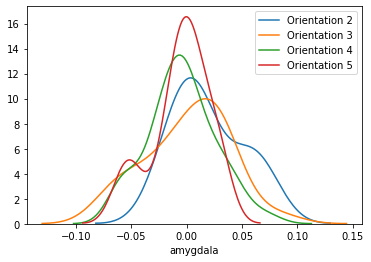

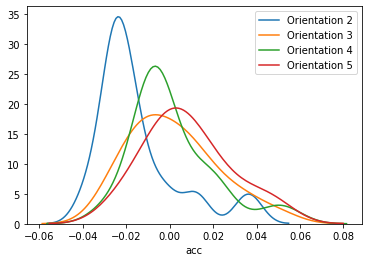

In [5]:

# calculate the probability for each orientation
prob_each_ori = np.zeros(4)
for i in range(4):
    prob_each_ori[i] = len(dataset[i])/len(data)
print(prob_each_ori)

# get the conditional probability for amygdala
for i in range(len(ranges)):
    sns.kdeplot(dataset[i]['amygdala'], label = 'Orientation ' + str(ranges[i]))
plt.xlabel("amygdala")
plt.show()

# get the conditional probability for acc
for i in range(len(ranges)):
    sns.kdeplot(dataset[i]['acc'], label = 'Orientation ' + str(ranges[i]))
plt.xlabel("acc")
plt.show()